In [1]:
import numpy as np
import cv2
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from skimage.transform import resize
from matplotlib.widgets import Slider
import ipywidgets as widgets
from IPython.display import display
import imgaug as ia
import imgaug.augmenters as iaa
import random

**Input Image**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


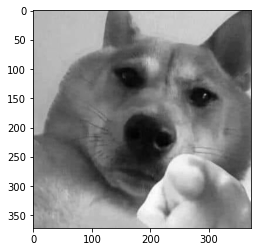

In [ ]:
input_img = plt.imread('/content/drive/MyDrive/image_assignment/doge_recuit.jpg')
	
grayscale_image = cv2.cvtColor(input_img, cv2.COLOR_RGB2GRAY)
plt.imshow(grayscale_image , cmap='gray')

#Arithmetic

##Arithmetic - AdditiveGaussianNoise

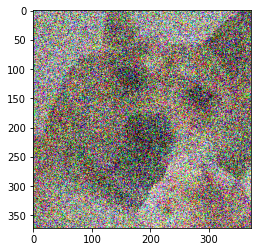

In [ ]:
#@title noise parameter { run: "auto" }
scale = 0.9 #@param {type:"slider", min:0.1, max:0.9, step:0.05}
ia.seed(1)
input_img = plt.imread('/content/drive/MyDrive/image_assignment/doge_recuit.jpg')
seq = iaa.Sequential([
    iaa.AdditiveGaussianNoise(scale=(scale*255))
])

images_aug = seq(images=input_img)
plt.imshow(images_aug)

##Arithmetic - JpegCompression

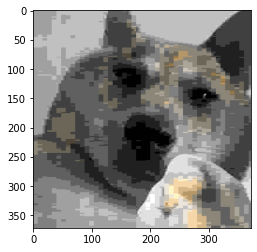

In [ ]:
#@title Compression parameter { run: "auto" }
scale = 100 #@param {type:"slider", min:20, max:100, step:1}
ia.seed(1)
input_img = plt.imread('/content/drive/MyDrive/image_assignment/doge_recuit.jpg')
seq = iaa.Sequential([
    iaa.JpegCompression(compression=(scale))
])

images_aug = seq(images=input_img)
plt.imshow(images_aug)

##Arithmetic - Invert

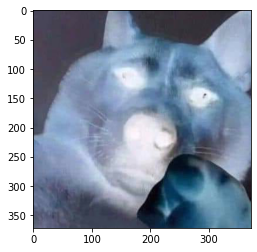

In [ ]:
#@title Invert parameter { run: "auto" }
ia.seed(1)
input_img = plt.imread('/content/drive/MyDrive/image_assignment/doge_recuit.jpg')
isInvert = True #@param {type:"boolean"}
if isInvert:
  num = 1.0
else:
  num = 0.0
input_img = plt.imread('/content/drive/MyDrive/image_assignment/doge_recuit.jpg')
seq = iaa.Sequential([
    iaa.Invert(num)
])

images_aug = seq(images=input_img)
plt.imshow(images_aug)

#Contrast

##Contrast - GammaContrast

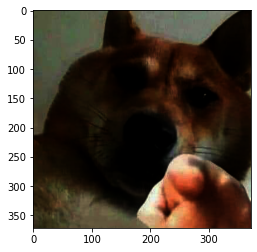

In [ ]:
#@title Gamma parameter { run: "auto" }
contrast = 3.5 #@param {type:"slider", min:0.1, max:4, step:0.1}
ia.seed(1)
input_img = plt.imread('/content/drive/MyDrive/image_assignment/doge_recuit.jpg')
seq = iaa.Sequential([
    iaa.GammaContrast(( contrast))
])

images_aug = seq(images=input_img)
plt.imshow(images_aug)

##Contrast - HistogramEqualization

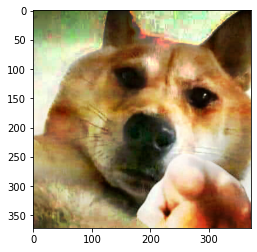

In [ ]:
ia.seed(1)
input_img = plt.imread('/content/drive/MyDrive/image_assignment/doge_recuit.jpg')
seq = iaa.Sequential([
    iaa.HistogramEqualization()
])

images_aug = seq(images=input_img)
plt.imshow(images_aug)

##Contrast - SigmoidContrast

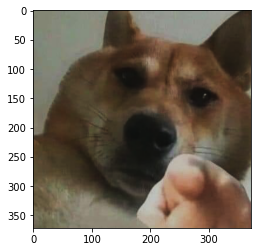

In [ ]:
#@title Sigmoid parameter. { run: "auto" }
gain = 4 #@param {type:"slider", min:3, max:10, step:1}
cutoff = 0.7 #@param {type:"slider", min:0.1, max:1, step:0.1}
ia.seed(1)
input_img = plt.imread('/content/drive/MyDrive/image_assignment/doge_recuit.jpg')
seq = iaa.Sequential([
    iaa.SigmoidContrast(gain=(gain), cutoff=(cutoff))
])

images_aug = seq(images=input_img)
plt.imshow(images_aug)

##Contrast - LogConstrast

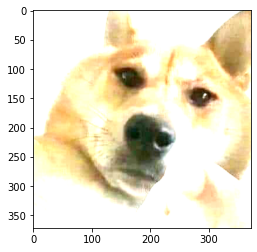

In [ ]:
#@title Log parameter. { run: "auto" }
gain = 2 #@param {type:"slider", min:0.1, max:2, step:0.1}
ia.seed(1)
input_img = plt.imread('/content/drive/MyDrive/image_assignment/doge_recuit.jpg')
seq = iaa.Sequential([
    iaa.LogContrast(gain=(gain))
])

images_aug = seq(images=input_img)
plt.imshow(images_aug)

#Blur

##Blur - GaussianBlur

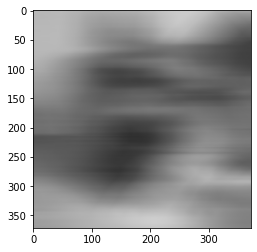

In [8]:
#@title Gaussian parameter { run: "auto" }
sigma = 60 #@param {type:"slider", min:10, max:70, step:1}
ia.seed(1)
input_img = plt.imread('/content/drive/MyDrive/image_assignment/doge_recuit.jpg')
seq = iaa.Sequential([
    iaa.GaussianBlur(sigma=(sigma))
])

images_aug = seq(images=input_img)
plt.imshow(images_aug)

##Blur - AverageBlur

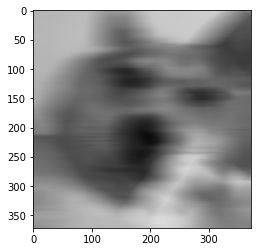

In [13]:
#@title Average parameter { run: "auto" }
k = 70 #@param {type:"slider", min:10, max:70, step:1}
ia.seed(1)
input_img = plt.imread('/content/drive/MyDrive/image_assignment/doge_recuit.jpg')
seq = iaa.Sequential([
    iaa.AverageBlur(k=(k))
])

images_aug = seq(images=input_img)
plt.imshow(images_aug)

##Blur - MotionBlur

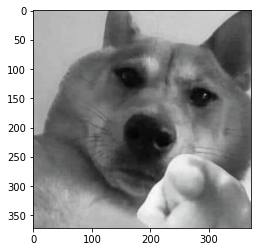

In [26]:
#@title Motion parameter { run: "auto" }
k = 70 #@param {type:"slider", min:10, max:70, step:1}
angle = 90 #@param {type:"slider", min:-360, max:360, step:1}
ia.seed(1)
input_img = plt.imread('/content/drive/MyDrive/image_assignment/doge_recuit.jpg')
seq = iaa.Sequential([
    iaa.MotionBlur(k=k, angle=[angle])
])

images_aug = seq(images=input_img)
plt.imshow(images_aug)

#Flip horizontally

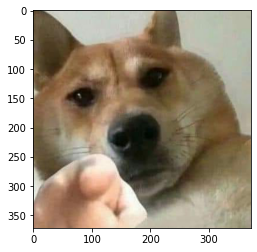

In [28]:
#@title Flip parameter { run: "auto" }
ia.seed(1)
input_img = plt.imread('/content/drive/MyDrive/image_assignment/doge_recuit.jpg')
isFlip = True #@param {type:"boolean"}
if isFlip:
  num = 1.0
else:
  num = 0.0
seq = iaa.Sequential([
    iaa.Flipud(num)
])

images_aug = seq(images=input_img)
plt.imshow(images_aug)

# IMAGE AUGMENTATION USING KERAS IMAGEDATAGENERATOR

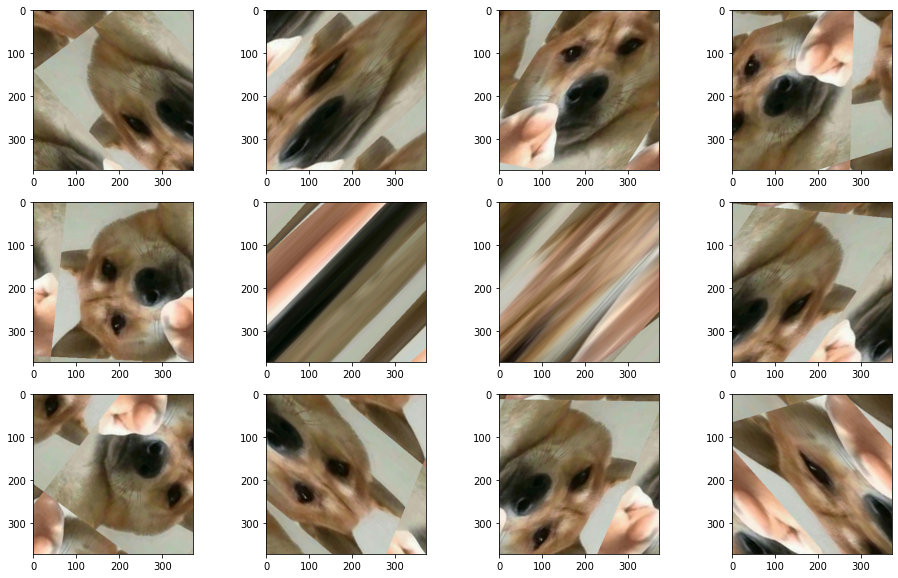

In [31]:
#@title Parameter. { run: "auto" }
input_img = plt.imread('/content/drive/MyDrive/image_assignment/doge_recuit.jpg')
fill_constant = 'constant'
fill_nearest = 'nearest'
fill_reflect = 'reflect'
fill_wrap = 'wrap'
fillmethod_dropdown = fill_wrap #@param ["fill_constant", "fill_nearest", "fill_reflect", "fill_wrap"] {type:"raw"}
rotation_slider = 170 #@param {type:"slider", min:0, max:360, step:10}
width_shift_slider = 123 #@param {type:"slider", min:0, max:1000, step:1}
height_shift_slider = 0 #@param {type:"slider", min:0, max:1000, step:1}
shear_slider = 108 #@param {type:"slider", min:0, max:1000, step:1}
zoom_slider = 0 #@param {type:"slider", min:0, max:10, step:0.1}
horizontal_flip_checkbox = True #@param {type:"boolean"}

w = 10
h = 10
fig = plt.figure(figsize=(16, 10))
columns = 4
rows = 3

img = np.array(input_img)
converted_img = img_to_array(img)  
converted_img = converted_img.reshape((1,) + converted_img.shape)

datagen = ImageDataGenerator(rotation_range=rotation_slider,
                               width_shift_range=width_shift_slider,
                               height_shift_range=height_shift_slider,
                               shear_range=shear_slider,
                               zoom_range=zoom_slider,
                               horizontal_flip=horizontal_flip_checkbox,
                               fill_mode = fillmethod_dropdown)
## Creates our batch of one image
pic = datagen.flow(converted_img,batch_size = 12)
  
for i in range(1, 13):
  batch = pic.next()
  im_result = batch[0].astype('uint8')
  fig.add_subplot(rows, columns, i)
  plt.imshow(im_result)

plt.show()

#Resizing with interpolation effect

**Parameter**

In [ ]:
input_img = plt.imread('/content/drive/MyDrive/image_assignment/doge_recuit.jpg')
inter_nearest = cv2.INTER_NEAREST 
inter_linear = cv2.INTER_LINEAR
inter_cubic = cv2.INTER_CUBIC
inter_area = cv2.INTER_AREA
#@title Resizing parameter. { run: "auto" }
resize_slider = 6 #@param {type:"slider", min:2, max:20, step:2} 
inter_dropdown = inter_nearest #@param ["inter_nearest", "inter_linear", "inter_cubic", "inter_area"] {type:"raw"}
# -----------------------------------------------------------------
def resizing(img , scale , inter_method): #inter_method [cv2.INTER_NEAREST , cv2.INTER_LINEAR , cv2.INTER_CUBIC , cv2.INTER_AREA]
  Scale_factors = 1 / scale
  resized_img = cv2.resize(img,None,fx=Scale_factors, fy=Scale_factors,interpolation = inter_method)

  return resized_img
#--------------------------------------------------------------------
input_img = resizing(input_img , resize_slider , inter_dropdown)
plt.imshow(input_img)

#Croping

In [ ]:
input_img = plt.imread('/content/drive/MyDrive/image_assignment/doge_recuit.jpg')
cnts = cv2.findContours(grayscale_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#@title Croping parameter. { run: "auto" }
x1 = 300 #@param {type:"number"}
x2 = 600 #@param {type:"number"}
y1 = 50 #@param {type:"number"}
y2 = 600 #@param {type:"number"}

ROI = input_img[y1:y2, x1:x2]

plt.imshow(ROI)

#Image Generator

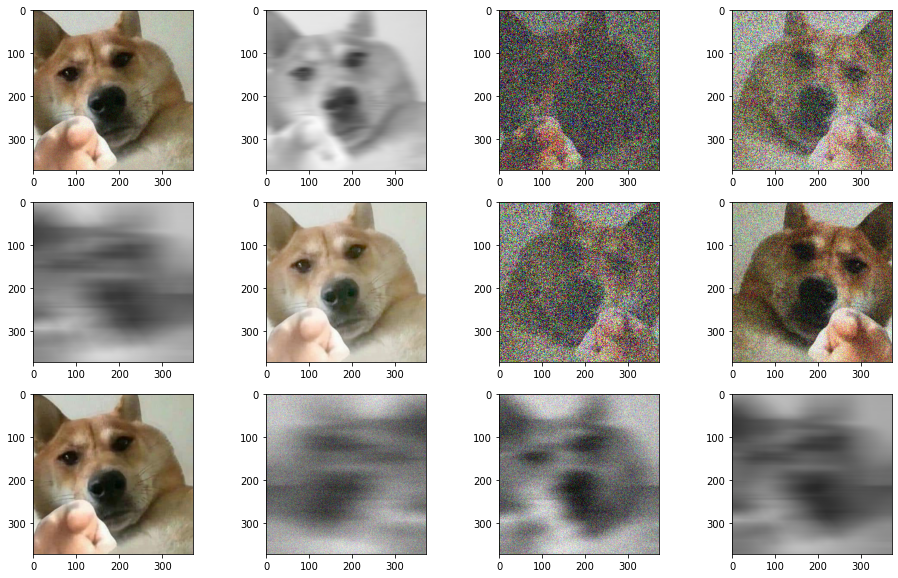

In [32]:
w = 10
h = 10
fig = plt.figure(figsize=(16, 10))
columns = 4
rows = 3

for i in range(1, 13):

  #@title Random
  #@markdown ### Blur
  blur_random = round(random.random())
  if blur_random == 1:
    blur_checkbox = True
  else:
    blur_checkbox = False
  blur_value = random.randrange(10, 70, 1)
  #blur_checkbox = True #@param {type:"boolean"}
  #blur_value = 10 #@param {type:"slider", min:10, max:70, step:1}

  #@markdown ### Noise
  noise_random = round(random.random())
  if noise_random == 1:
    noise_checkbox = True
  else:
    noise_checkbox = False
  noise_value = np.arange(0.05, 0.95, 0.05)
  noise_random_val1 = np.random.choice(noise_value, size=1)
  noise_random_val2 = noise_random_val1[0]
  #noise_checkbox = True #@param {type:"boolean"}
  #noise_value = 0.1 #@param {type:"slider", min:0.1, max:0.9, step:0.05}

  #@markdown ### Horzizontal Flip
  flip_random = noise_random = round(random.random())
  if flip_random == 1:
    isFlip = True
  else:
    isFlip = False
  #isFlip = True #@param {type:"boolean"}

  #@markdown ### Contrast
  contrast_random = noise_random = round(random.random())
  if contrast_random == 1:
    contrast_checkbox = True
  else:
    contrast_checkbox = False
  contrast_value = np.arange(0.1, 4, 0.1)
  contrast_random_val1 = np.random.choice(contrast_value, size=1)
  contrast_random_val2 = contrast_random_val1[0]
  #contrast_checkbox = True #@param {type:"boolean"}
  #contrast_value = 1 #@param {type:"slider", min:0.1, max:4, step:0.1}

  ia.seed(1)
  input_img = plt.imread('/content/drive/MyDrive/image_assignment/doge_recuit.jpg')

  #Blur
  if blur_checkbox == True:
    blur = iaa.GaussianBlur(sigma=(blur_value))
  else:
    blur = iaa.GaussianBlur(sigma=(0))
  #Noise
  if noise_checkbox == True:
    noise = iaa.AdditiveGaussianNoise(scale=(noise_random_val2*255))
  else:
    noise = iaa.AdditiveGaussianNoise(scale=(0*255))
  #Flip
  if isFlip:
    flip = iaa.Flipud(1.0)
  else:
    flip = iaa.Flipud(0.0)
  #Contrast
  if contrast_checkbox == True:
    contrast = iaa.GammaContrast(( contrast_random_val2))
  else:
    contrast = iaa.GammaContrast(( 1))

  seq = iaa.Sequential([
      blur,
      noise,
      flip,
      contrast,
  ], random_order=True)


  fig.add_subplot(rows, columns, i)
  images_aug = seq(images=input_img)
  plt.imshow(images_aug)
plt.show()

In [ ]:
values = np.arange(0.05, 0.95, 0.05)
nnum = np.random.choice(values, size=1)
nnum[0]

0.2